In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets # New
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [121]:
### ----------------------
### global variables
### ----------------------

RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

TEST_SIZE = 0.2
N_SAMPLE = 1000
ALPHA = 0.1 # LEARNING RATE
NOISE = 0.2
EPOCHS = 400  # NUMBER OF ITERATIONS

# input and output directories
inpDir = '../../input'
outDir = '../output'

params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

In [122]:
# Loading Dataset

x, y = datasets.make_moons(n_samples = N_SAMPLE, # number of datapoints
                           noise = NOISE,   # Mixing
                           shuffle = True,   # shuffleing
                           random_state = RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

In [123]:
# EDA
# 1. Plot the data
# 2. Print min max averages of this dataset

data_df = pd.DataFrame(x, columns = ["A", "B"])
data_df = pd.concat([data_df, pd.DataFrame({"target" : y})], axis = "columns")
data_df.head(3)

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1


<Axes: xlabel='A', ylabel='B'>

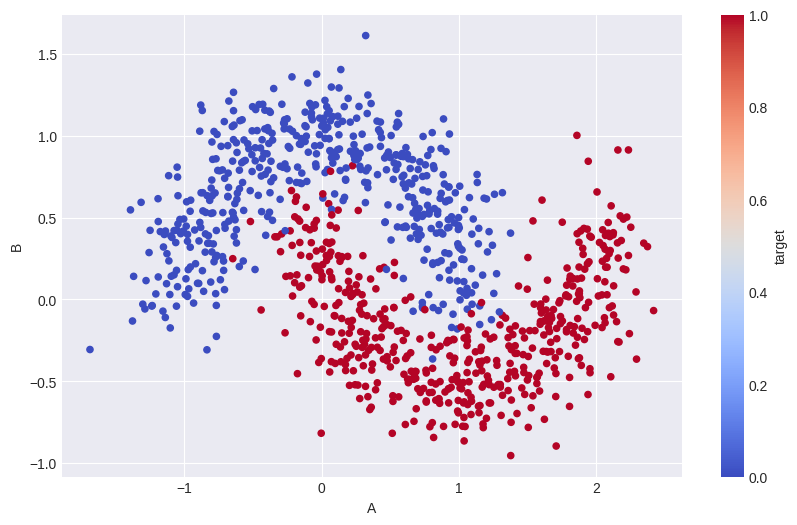

In [124]:
data_df.plot.scatter("A", "B", c = 'target', cmap = CMAP)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE,
                                                    stratify = y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [126]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape)
type(data_train)

(900, 3)

numpy.ndarray

In [127]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [128]:
# building a function for prediction
# Returns 0 or 1

def predict(row, wts):

    z = wts[0]
    for i in range(len(row) - 1):
        z += wts[i+1] * row[i]

    return 1 if z >= 0 else 0


In [129]:
weights = np.array([0.1, 2.0, 1.0])
predict(data_df.iloc[0, :].values, weights)

1

In [130]:

# function for implementing the training.
rng = np.random.default_rng(seed = RANDOM_STATE)
def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1]) # randomly generated weights
    m = train.shape[0]  # number of samples

    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)

            # Error
            dz = prediction - row[-1]   # a - y

            # removing possibility of -ve errors
            sum_error += (prediction - row[-1]) ** 2

            # Updating the weights
            weights[0] += -alpha * dz / m   # for the threshold

            for i in range(len(row) - 1):   # iterating for weights
                weights[i + 1] += -alpha * row[i] * dz / m


        errors.append(sum_error / m)

    return errors, weights




In [131]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)



In [132]:
weights

array([-6.44966640e-05,  2.23695781e-04, -3.67655630e-04])

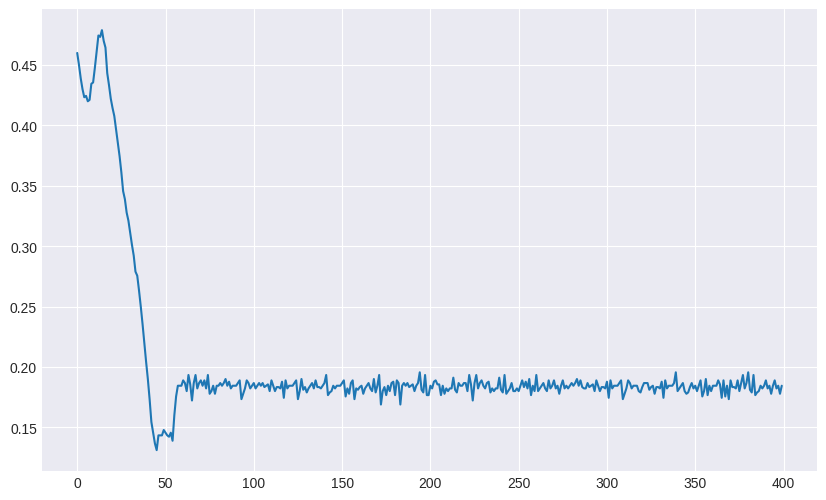

In [133]:
# fig, ax = plt.subplots()
plt.plot(np.arange(EPOCHS), errors)
plt.show()


In [134]:
def fn_plot_decision_boundary(wgts, x):

    fig, ax = plt.subplots(figsize = (8, 5))

    dm = 0.01

    x_min, x_max = x[:, 0].min(), x[:, 0].max()
    y_min, y_max = x[:, 1].min(), x[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    XX = np.c_[xx.ravel(), yy.ravel()]

    XX = np.hstack((XX, np.ones((XX.shape[0], 1))))

    y_pred = []

    for row in XX:
        y_p = predict(row, wgts)
        y_pred.append(y_p)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha = 0.8, cmap = plt.cm.Paired)

    ax.scatter(x[:, 0], x[:, 1], c = x[:, 2], edgecolor = "k", cmap = CMAP)




In [135]:
weights

array([-6.44966640e-05,  2.23695781e-04, -3.67655630e-04])

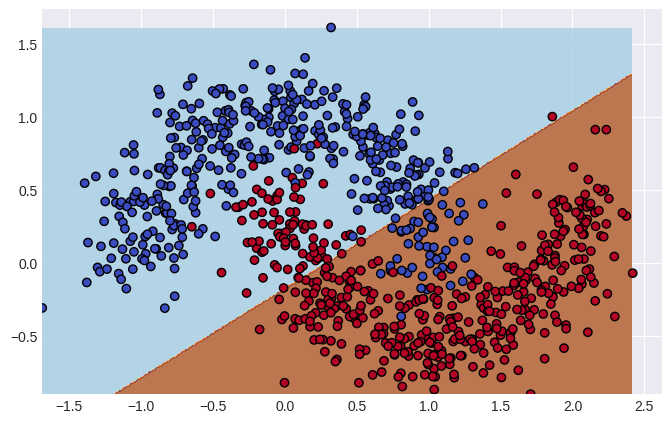

In [136]:
fn_plot_decision_boundary(weights, data_train)